# Guitar tuner experiment 2

This experiment tries improve on the ponderated average discovered in Experiment 1

In [1]:
import numpy as np
from scipy.fftpack import rfft
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile

import fftlib

In [2]:
SOUNDS = [
    ("mi82.4", 82.41, "sounds/guitar/082.4_mi_1.wav"),
    ("la110", 110, "sounds/guitar/110_la_1.wav"),
    ("re146.8", 146.8, "sounds/guitar/146.8_re_1.wav"),
    ("sol196", 196, "sounds/guitar/196_sol_1.wav"),
    ("si246.9", 246.9, "sounds/guitar/246.9_si_1.wav"),
    ("mi329.6", 329.6, "sounds/guitar/329.6_mi_1.wav"),
]
_ = [
    ("mi82.4", 82.41, "sounds/guitar/082.4_mi_2.wav"),
    ("la110", 110, "sounds/guitar/110_la_2.wav"),
    ("re146.8", 146.8, "sounds/guitar/146.8_re_2.wav"),
    ("sol196", 196, "sounds/guitar/196_sol_2.wav"),
    ("si246.9", 246.9, "sounds/guitar/246.9_si_2.wav"),
    ("mi329.6", 329.6, "sounds/guitar/329.6_mi_2.wav"),
]

SAMPLE_DUR = 200. / 1000.


# Creates [(rate, data), ...]:
WAVES = [wavfile.read(filename) for _, _, filename in SOUNDS]
DURATIONS = [len(data)/rate for rate, data in WAVES]

/usr/local/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
SAMPLES = [
    fftlib.sampling(rate, data.T, SAMPLE_DUR)
    for (rate, data) in WAVES
]

In [4]:
## WARNING, DO NOT RUN EVERYTIME

# matplotlib.rcParams['figure.figsize'] = (20.0, 500.0)
# N = len(SOUNDS)*max(len(sound) for sound in SAMPLES)
# for i, sound in enumerate(SAMPLES):
#     for j, sample in enumerate(sound):
#         plt.subplot(N, j + 1, i + 1)
#         plt.plot(
#             np.linspace(SAMPLE_DUR*i, SAMPLE_DUR*(i+1), len(sample)),
#             sample
#         )
# 
# plt.show()

In [5]:
fourier_samples = [[] for _ in SOUNDS]
frequencies = [None for _ in SOUNDS]

for i, sound in enumerate(SAMPLES):
    for j, sample in enumerate(sound):
        frequencies[i], amp = fftlib.analysis(WAVES[i][0], sample)
        fourier_samples[i].append(amp)

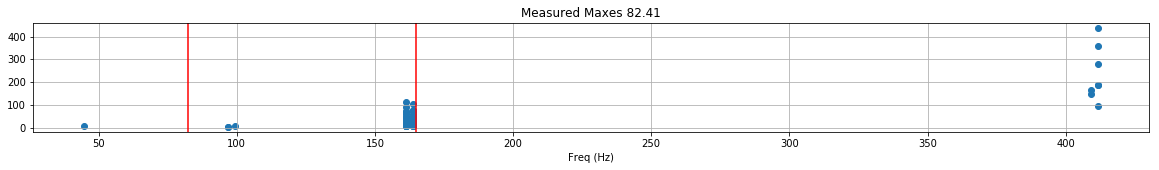

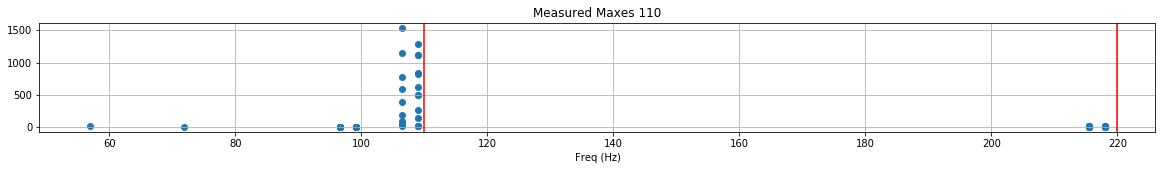

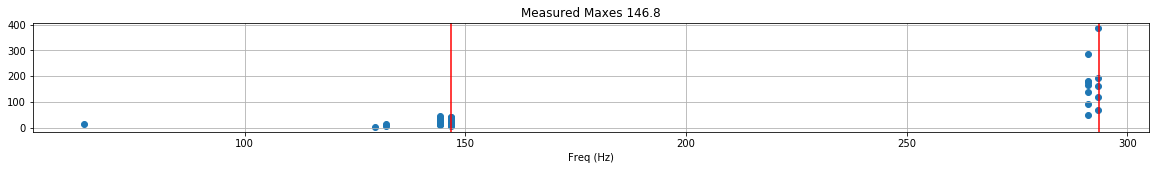

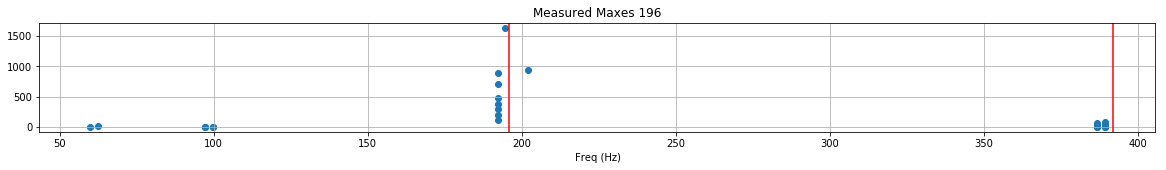

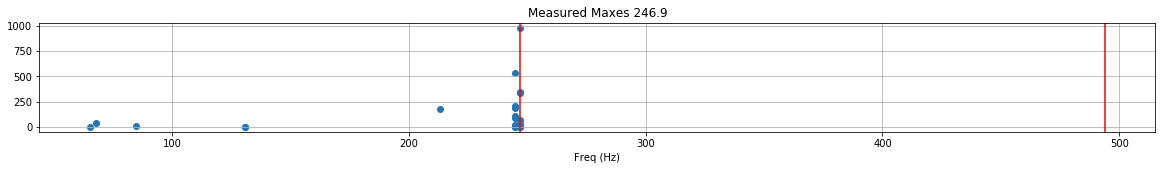

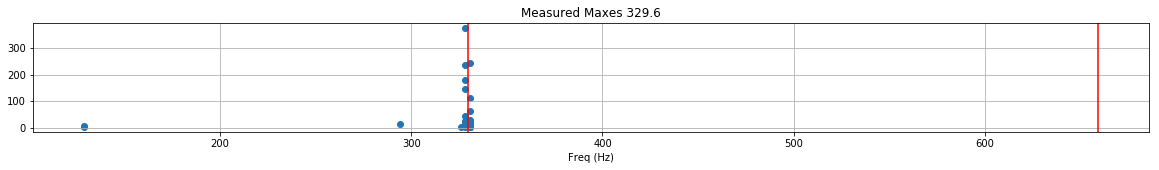

In [6]:
matplotlib.rcParams['figure.figsize'] = (20.0, 2.0)

for fourier, freq, sound in zip(fourier_samples, frequencies, SOUNDS):
    maxes = [(freq[np.argmax(amp)], np.max(amp)) for amp in fourier]

    plt.scatter(
        x=[x for x, _ in maxes],
        y=[y for _, y in maxes]
    )

    plt.axvline(x=sound[1], color="red")
    plt.axvline(x=2*sound[1], color="red")
    plt.xlabel("Freq (Hz)")
    plt.title(f"Measured Maxes {sound[1]}")
    plt.grid()
    plt.show()

## Test 1 

In this test we do a simple ponderated estimation of the frequence from the maximum frequence from each sample. 

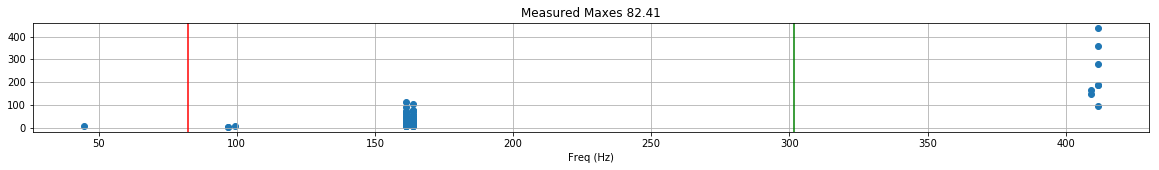

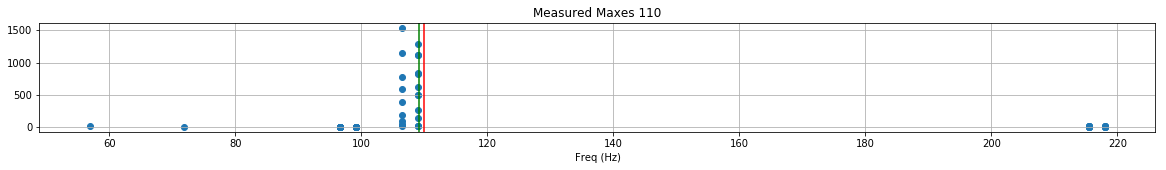

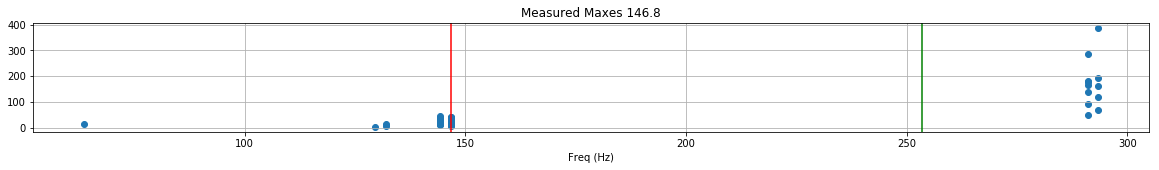

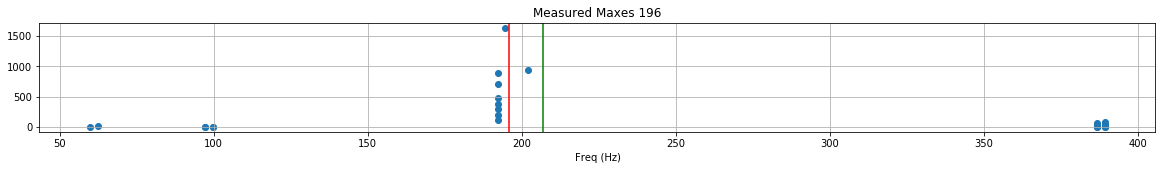

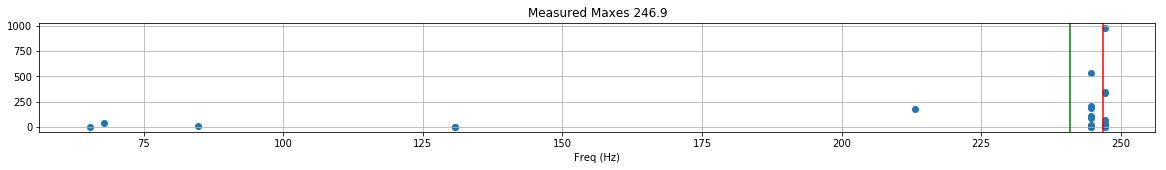

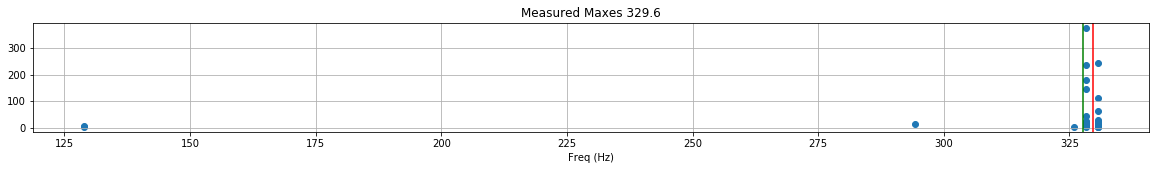

In [7]:
matplotlib.rcParams['figure.figsize'] = (20.0, 2.0)

MEASURED_NOTES = []
for fourier, freq, sound in zip(fourier_samples, frequencies, SOUNDS):
    maxes = [(freq[np.argmax(amp)], np.max(amp)) for amp in fourier]

    plt.scatter(
        x=[x for x, _ in maxes],
        y=[y for _, y in maxes]
    )
    MEASURED_NOTES.append(sum(x*y for x, y in maxes)/sum(y for _, y in maxes))
    
    plt.axvline(x=sound[1], color="red")
    plt.axvline(x=MEASURED_NOTES[-1], color="green")
    plt.xlabel("Freq (Hz)")
    plt.title(f"Measured Maxes {sound[1]}")
    plt.grid()
    plt.show()

In [8]:
for note, (f, e, _) in zip (MEASURED_NOTES, SOUNDS):
    # print(f"Average for {note}:")
    print(f"Measured note: {note:.2f}Hz")
    print(f"Expected note: {e:.2f}Hz")
    print(f"Diff:          {e - note:.2f}Hz")
    print(f"%:             {(e - note)/e*100:.2f}%")
    print(f" ")

Measured note: 301.71Hz
Expected note: 82.41Hz
Diff:          -219.30Hz
%:             -266.11%
 
Measured note: 109.20Hz
Expected note: 110.00Hz
Diff:          0.80Hz
%:             0.73%
 
Measured note: 253.43Hz
Expected note: 146.80Hz
Diff:          -106.63Hz
%:             -72.64%
 
Measured note: 207.00Hz
Expected note: 196.00Hz
Diff:          -11.00Hz
%:             -5.61%
 
Measured note: 240.89Hz
Expected note: 246.90Hz
Diff:          6.01Hz
%:             2.44%
 
Measured note: 327.73Hz
Expected note: 329.60Hz
Diff:          1.87Hz
%:             0.57%
 


## Test 2

Same estimator as before but we remove the points with an amplitude smaller than `AMP` times the max amplitude 

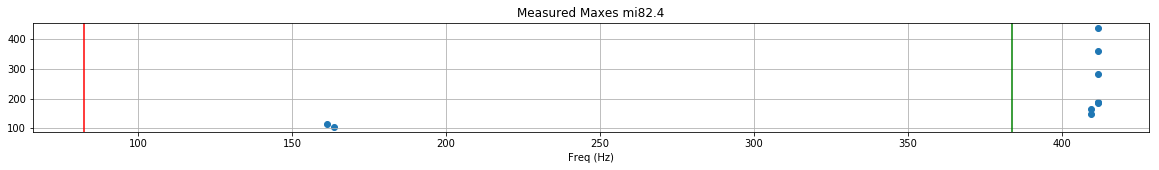

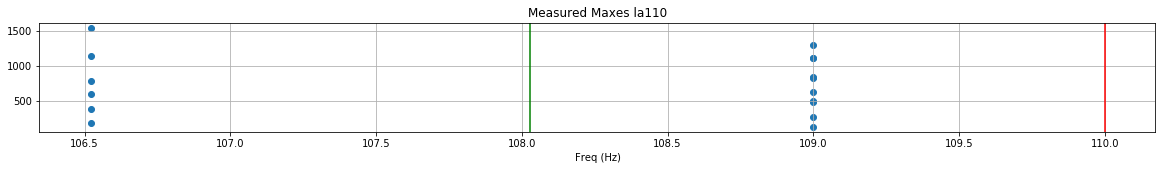

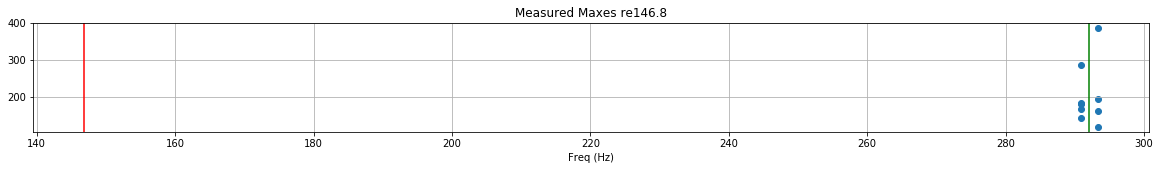

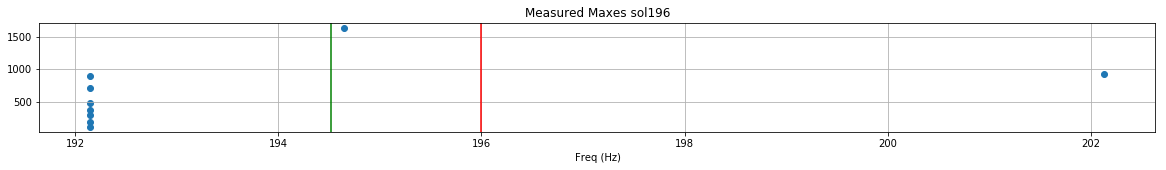

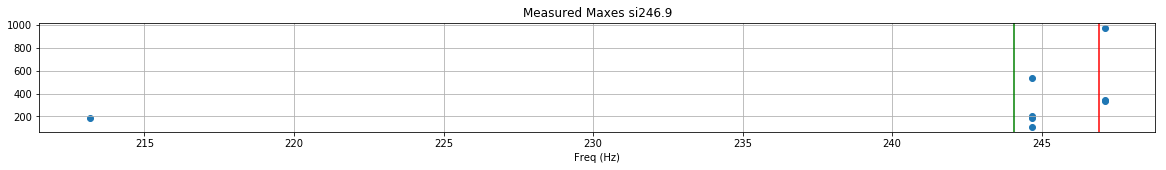

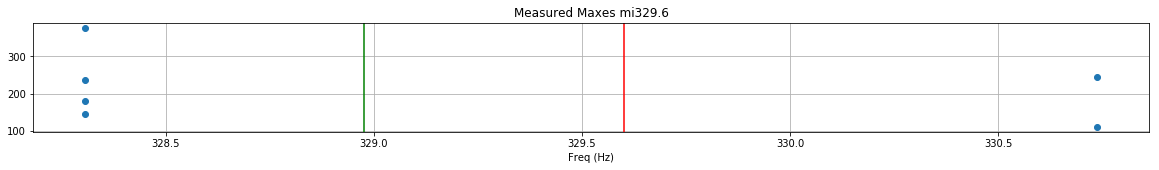

In [9]:
matplotlib.rcParams['figure.figsize'] = (20.0, 2.0)

AMP = 100

MEASURED_NOTES = []
for fourier, freq, sound in zip(fourier_samples, frequencies, SOUNDS):
    maxes = [(freq[np.argmax(amp)], np.max(amp)) for amp in fourier if np.max(amp) > AMP]

    plt.scatter(
        x=[x for x, _ in maxes],
        y=[y for _, y in maxes]
    )
    MEASURED_NOTES.append(sum(x*y for x, y in maxes)/sum(y for _, y in maxes))
    
    plt.axvline(x=sound[1], color="red")
    plt.axvline(x=MEASURED_NOTES[-1], color="green")
    plt.xlabel("Freq (Hz)")
    plt.title(f"Measured Maxes {sound[0]}")
    plt.grid()
    plt.show()

In [10]:
square_error = 0
for note, (f, e, _) in zip (MEASURED_NOTES, SOUNDS):
    square_error += ((e - note)/e) ** 2
    # print(f"Average for {note}:")
    print(f"Measured note: {note:.2f}Hz")
    print(f"Expected note: {e:.2f}Hz")
    print(f"Diff:          {e - note:.2f}Hz")
    print(f"%:             {(e - note)/e*100:.2f}%")
    print(f" ")

mean_square_error = square_error/len(SOUNDS)
print(f"MSE: {mean_square_error*100:.2f}%")

Measured note: 383.82Hz
Expected note: 82.41Hz
Diff:          -301.41Hz
%:             -365.74%
 
Measured note: 108.03Hz
Expected note: 110.00Hz
Diff:          1.97Hz
%:             1.79%
 
Measured note: 292.13Hz
Expected note: 146.80Hz
Diff:          -145.33Hz
%:             -99.00%
 
Measured note: 194.52Hz
Expected note: 196.00Hz
Diff:          1.48Hz
%:             0.76%
 
Measured note: 244.07Hz
Expected note: 246.90Hz
Diff:          2.83Hz
%:             1.15%
 
Measured note: 328.98Hz
Expected note: 329.60Hz
Diff:          0.62Hz
%:             0.19%
 
MSE: 239.28%
